# Diabetes Prediction Project

**Proyek ini bertujuan untuk memprediksi kemungkinan seseorang menderita diabetes berdasarkan data medis.**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Upload data
from google.colab import files
files.upload()  # Upload file kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"putrab13","key":"4a2150dc4035e8d94d06d938f31f3ac8"}'}

In [4]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
100% 734k/734k [00:00<00:00, 1.55MB/s]
100% 734k/734k [00:00<00:00, 1.55MB/s]


In [7]:
import zipfile
with zipfile.ZipFile('diabetes-prediction-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('diabetes_dataset')

In [8]:
!ls diabetes_dataset

diabetes_prediction_dataset.csv


# Step 1: Data Loading

In [9]:

print("Loading dataset...")
df = pd.read_csv('diabetes_dataset/diabetes_prediction_dataset.csv')


Loading dataset...


# Step 2: Data Understanding

In [10]:
print("\nDataset Information:")
print(df.info())
print("\nDataset Description:")
print(df.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

Dataset Description:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.5

# Visualizing the distribution of target variable

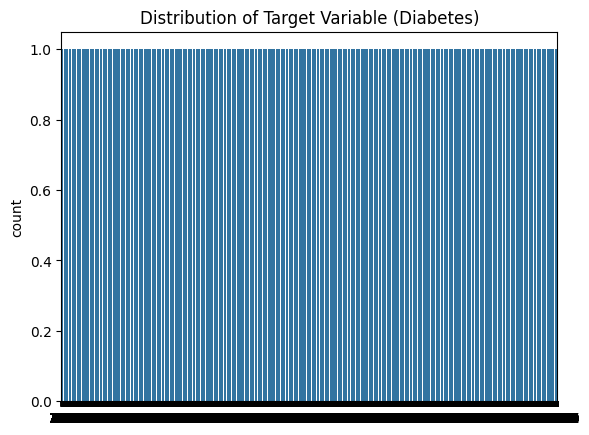

In [11]:
sns.countplot(df['diabetes'])
plt.title("Distribution of Target Variable (Diabetes)")
plt.show()

# Visualizing numerical features

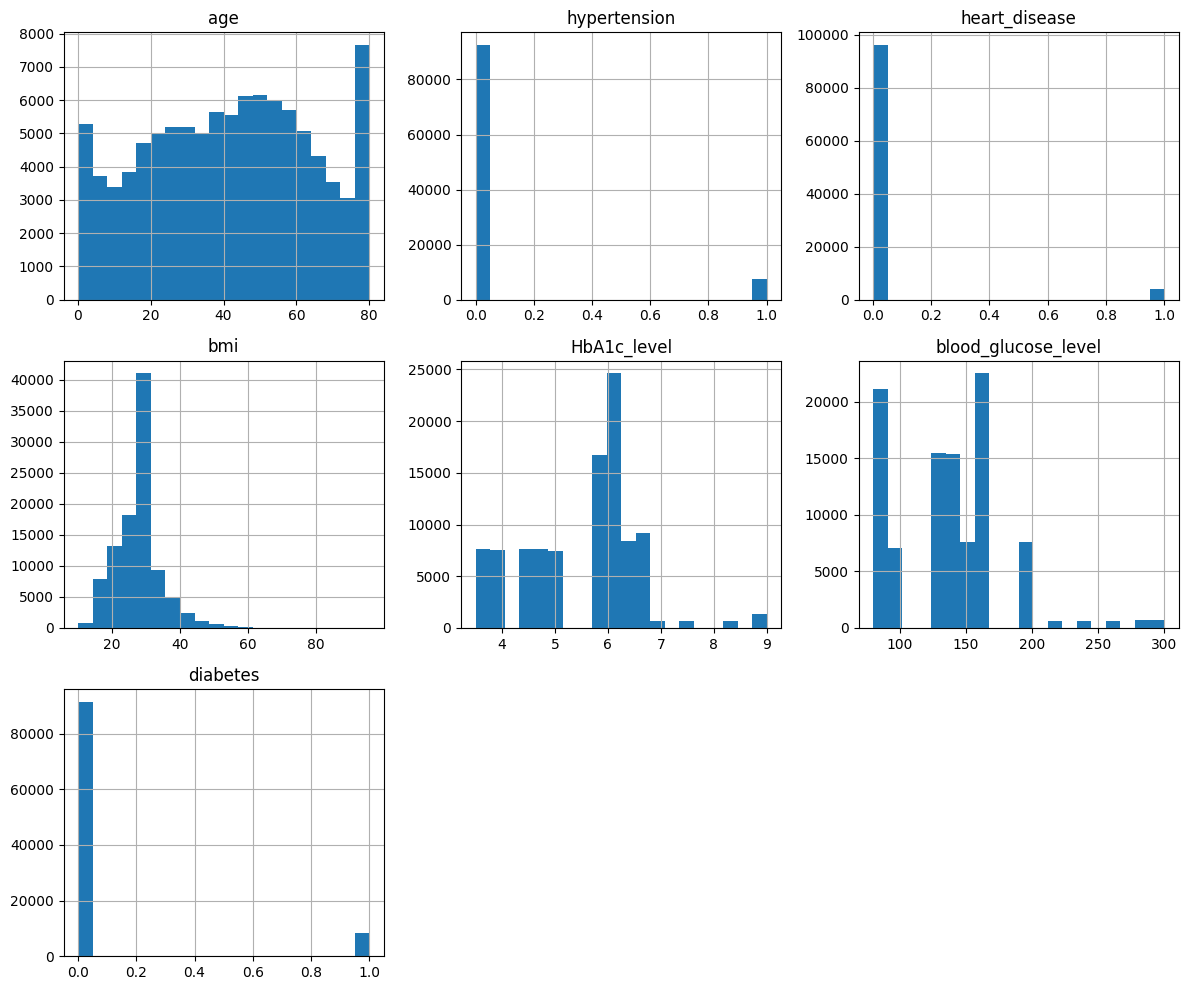

In [12]:
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Step 3: Data Preparation

In [13]:
print("\nPreparing the data...")


Preparing the data...


# Encoding categorical variables

In [14]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # Female -> 0, Male -> 1
df['smoking_history'] = le.fit_transform(df['smoking_history'])  # Encode smoking history


# Normalizing numerical features

In [15]:
scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df[numerical_features] = scaler.fit_transform(df[numerical_features])



# Splitting the data into training and testing sets

In [16]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 4: Modeling

In [17]:
print("\nTraining the model...")
model = LogisticRegression()
model.fit(X_train, y_train)


Training the model...


LogisticRegression()

# Step 5: Evaluation

In [18]:
print("\nEvaluating the model...")
y_pred = model.predict(X_test)


Evaluating the model...


# Accuracy

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.88%


# Classification report

In [20]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



# Confusion Matrix

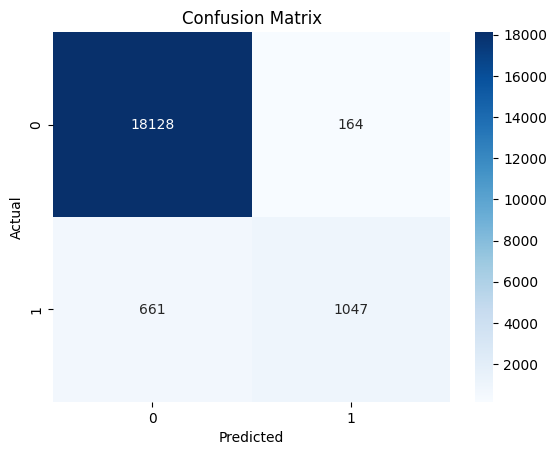


Project Completed Successfully!


In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nProject Completed Successfully!")